# Classifying languages
## Part 1

We used the following two commands to get the list of anomaly scores

`java -jar negsel2.jar -self english.train -n 10 -r 4 -c -l < english.test > englishtest.txt`

`java -jar negsel2.jar -self english.train -n 10 -r 4 -c -l < tagalog.test > tagalogtest.txt`


The remainder of the AUC calculations will be done in this Notebook using these text files


In [12]:
# It is also required to install scikit-learn. Uncomment the following lines
# import sys
# !{sys.executable} -m pip install scikit-learn

In [13]:
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [14]:
english = np.loadtxt("ClassifyingLanguagesFiles/englishtest.txt", dtype=float)
tagalog = np.loadtxt("ClassifyingLanguagesFiles/tagalogtest.txt", dtype=float)

def compute_roc_auc(file1, file2):
    maximum = max(max(file1), max(file2))

    #changing the anomaly scores to be between 0 and 1, 
    #this doesn't matter for the ROC curve since it is based on true positive / false positive etc.
    file1 = [[x/maximum,0] for x in file1]
    file2 = [[x/maximum,1] for x in file2]

    #merging the two test string sets
    anomaly_scores = file1 + file2

    #sort by anomaly score
    anomaly_scores.sort(reverse=True)

    #split the list up into actual class (y) and anomal score (y_pred)
    y = [y for [x,y] in anomaly_scores]
    y_pred = [x for [x,y] in anomaly_scores]

    #using the functions from sklearn to easily calculate the roc_curve
    fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    return fpr, tpr, threshold, roc_auc

fpr, tpr, threshold, roc_auc = compute_roc_auc(english, tagalog)

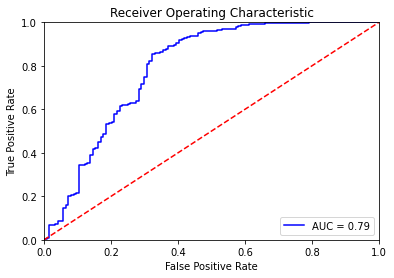

In [15]:
def plot_ROC(fpr, tpr, roc_auc):
    #plotting the RCO
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_ROC(fpr, tpr, roc_auc)

## Part 2

We used the following two commands to get the list of anomaly scores

`java -jar negsel2.jar -self english.train -n 10 -r 1 -c -l < english.test > englishtest_r1.txt`

`java -jar negsel2.jar -self english.train -n 10 -r 1 -c -l < tagalog.test > tagalogtest_r1.txt`

`java -jar negsel2.jar -self english.train -n 10 -r 9 -c -l < english.test > englishtest_r9.txt`

`java -jar negsel2.jar -self english.train -n 10 -r 9 -c -l < tagalog.test > tagalogtest_r9.txt`

Recall that r indicates that we will build a repertoire containing all patterns of length 10 that do not share any contiguous substring of length more than r with the train data. If we set r to 1, then the repetoire is almost empty. On the other hand, if we set r to 9, then many of the substring in the train data can also be in the repetoire, this might mean that the algorithm is overfitted and gives unreasonably high scores.

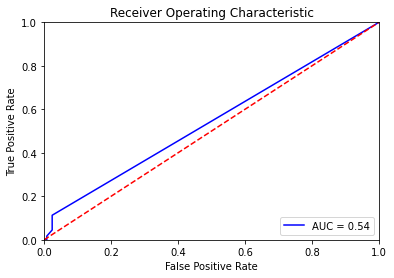

In [16]:
english_r1 = np.loadtxt("ClassifyingLanguagesFiles/englishtest_r1.txt", dtype=float)
tagalog_r1 = np.loadtxt("ClassifyingLanguagesFiles/tagalogtest_r1.txt", dtype=float)

#print(english_r1)
#print(tagalog_r1)

fpr, tpr, threshold, roc_auc = compute_roc_auc(english_r1, tagalog_r1) 
plot_ROC(fpr, tpr, roc_auc)

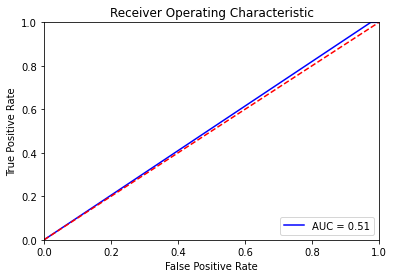

In [17]:
english_r9 = np.loadtxt("ClassifyingLanguagesFiles/englishtest_r9.txt", dtype=float)
tagalog_r9 = np.loadtxt("ClassifyingLanguagesFiles/tagalogtest_r9.txt", dtype=float)

#print(english_r9)
#print(tagalog_r9)

fpr, tpr, threshold, roc_auc = compute_roc_auc(english_r9, tagalog_r9) 
plot_ROC(fpr, tpr, roc_auc)

As expected, both settings are bad at correctly identifying the anomalies. For r=1 it indeed seems that the repertoire is veyr small because the code runs noticeably faster. For r=9, we hypothesize that ??

We think r=1 is better, simply because the AUC is higher. But both settings perform badly, so it would be better to choose a value for r between 1 and 9, like 4.

exercise:
Specifically, what behaviour do you observe
at r = 1 and r = 9 and how can you explain this behaviour? Which value of r leads to the best discrimination?

## Part 3

Looking at the results above, we want to use r=4 again because that really showed a difference between english and tagalog.

We executed the following commands:

`java -jar negsel2.jar -self english.train -n 10 -r 4 -c -l < plautdietsch.txt > plautdietschtest.txt`

`java -jar negsel2.jar -self english.train -n 10 -r 4 -c -l < hiligaynon.txt > hiligaynontest.txt`

`java -jar negsel2.jar -self english.train -n 10 -r 4 -c -l < middle-english.txt > middleenglishtest.txt`

`java -jar negsel2.jar -self english.train -n 10 -r 4 -c -l < xhosa.txt > xhosatest.txt`

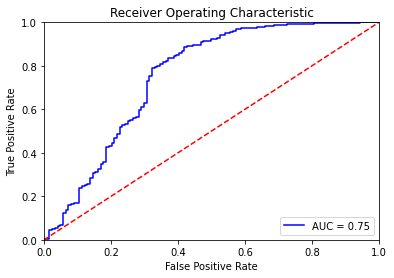

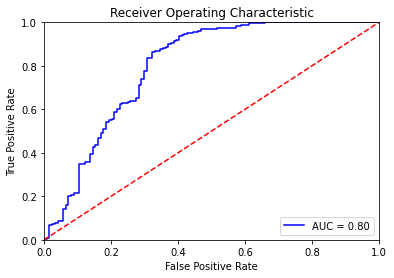

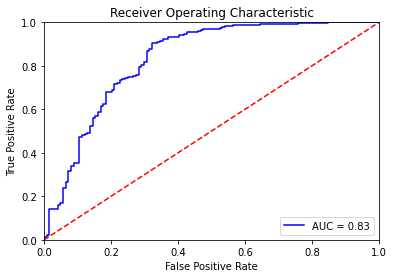

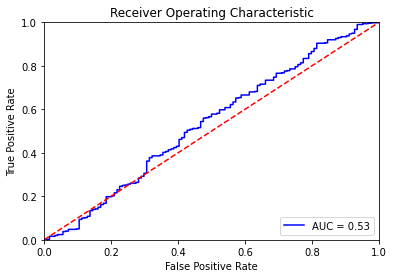

In [18]:
english = np.loadtxt("ClassifyingLanguagesFiles/englishtest.txt", dtype=float)
plautdietsch = np.loadtxt("ClassifyingLanguagesFiles/plautdietschtest.txt", dtype=float)
hiligaynon = np.loadtxt("ClassifyingLanguagesFiles/hiligaynontest.txt", dtype=float)
xhosa = np.loadtxt("ClassifyingLanguagesFiles/xhosatest.txt", dtype=float)
middle_english = np.loadtxt("ClassifyingLanguagesFiles/middleenglishtest.txt", dtype=float)

fpr, tpr, threshold, roc_auc = compute_roc_auc(english, plautdietsch) 
plot_ROC(fpr, tpr, roc_auc)

fpr, tpr, threshold, roc_auc = compute_roc_auc(english, hiligaynon) 
plot_ROC(fpr, tpr, roc_auc)

fpr, tpr, threshold, roc_auc = compute_roc_auc(english, xhosa) 
plot_ROC(fpr, tpr, roc_auc)

fpr, tpr, threshold, roc_auc = compute_roc_auc(english, middle_english) 
plot_ROC(fpr, tpr, roc_auc)

## Observations

1. Middle-english is the most difficult to distinguish from English, Xhosa the easiest.
2. Middle-english has a much lower AUC than the others. This can be explained by the fact that middle-english should be much more similar to english than the other languages and therefore there are more false positives compared to true positives.
3. Plautdietsch has its origins in Dutch en German. Hiligaynon is spoken in the Philippines. Xhosa is spoken in Sotuh-Africa. We would say that Dutch/German is more similar to English than the other two languages, this can also be found in the ROC because the AUC from Plautdietsch is lower.
4. For the other languages, we don't have enough knowledge to understand why Xhosa is easiest to distinguish from English.